# Neural Network Sample
TensorFlow と Keras による 手書き文字の認識

## ライブラリとデータの読み込み

In [37]:
# ライブラリの読み込み
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix

# データの読み込み
(X_train, y_train), (X_test, y_test) = mnist.load_data()

##データ数の確認
MNIST（エムニスト）データ：手書き文字認識用のデータ  
28px x 28px の画像 70,000枚  
訓練用 60,000枚  
テスト用 10,000枚  

In [38]:
print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shape:', y_test.shape)

X_train.shape: (60000, 28, 28)
X_test.shape: (10000, 28, 28)
y_train.shape: (60000,)
y_test.shape: (10000,)


##データを視覚化して確認
先頭の81個を 9 x 9 に並べて確認

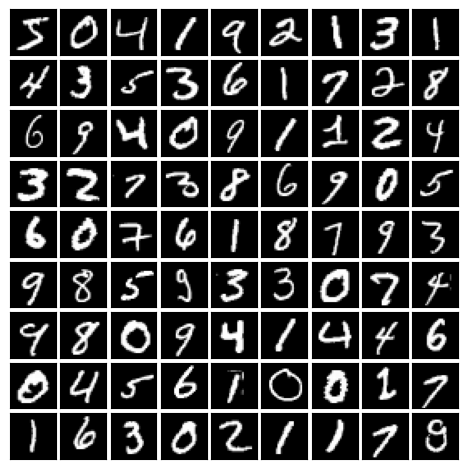

In [39]:
fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=0.5, bottom=0, top=0.5, hspace=0.1, wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape((28, 28)), cmap='gray')

##テンソルデータのスケール変換
60,000枚 x 28x28 のテンソルを、60,000 x 784 の行列に、  
10,000枚 x 28x28 のテンソルを、10,000 x 784 の行列に変換し、
各画素の濃淡情報 0 -255 を 0 - 1 へ変換

In [40]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train/255.
X_test = X_test/255.

##クラスラベルを変形
ラベルの数字が入っているベクトルを 1-hot ベクトルに変換  
1-hot ベクトル：どれかひとつが 1 でその他が 0 となるベクトル  
60,000 x 1桁（ 0 - 9 ）のベクトル　＞　60,000 x 10桁（1-hotベクトル ）の 行列へ

In [41]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

##ネットワークの構築
Sequential API  を用いた、多層ニューラルネットワーク  
入力層：784　←　28x28画素  
中間層：64  
出力層：10　←  0 - 9 を 1-hot ベクトルで  
　  
  
参考：1-hot-ベクトルとは以下のようなものです．

0 → [1,0,0,0,0,0,0,0,0,0]  
1 → [0,1,0,0,0,0,0,0,0,0]  
2 → [0,0,1,0,0,0,0,0,0,0]  
3 → [0,0,0,1,0,0,0,0,0,0]  


In [42]:
model = Sequential()

model.add(Dense(units=64, input_shape=(784,), activation='relu'))
model.add(Dense(units=10, activation='softmax'))

##モデルをコンパイル
最適化手法(optimizer)，損失関数(loss)，評価指標(metrics)を指定

* loss: 損失関数(多値分類: categorical_crossentropy, 二値分類: binary_crossentropy)
* optimizer: 最適化手法
* metrics: 評価指標


In [43]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

##機械学習


* epochs：モデルを学習するエポック数（繰り返し学習回数）
* batch_size：バッチ処理単位。設定したサイズでデータを取り出す
* verbose:：ログ（0：出力しない　1：プログレスバーで標準出力　2：エポック毎に1行のログを出力）

　　  
* loss：正解とのズレを意味する数値。0に近づくほど正解に近い。
* accuracy：正確性。100%に近づくほど正解に近い。
* validation loss：検証データに対する loss
* validation accuracy：検証データに対する精度


In [44]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/20
422/422 - 2s - loss: 1.3549 - accuracy: 0.6686 - val_loss: 0.7127 - val_accuracy: 0.8632 - 2s/epoch - 4ms/step
Epoch 2/20
422/422 - 2s - loss: 0.6297 - accuracy: 0.8490 - val_loss: 0.4558 - val_accuracy: 0.8985 - 2s/epoch - 4ms/step
Epoch 3/20
422/422 - 2s - loss: 0.4862 - accuracy: 0.8734 - val_loss: 0.3752 - val_accuracy: 0.9103 - 2s/epoch - 4ms/step
Epoch 4/20
422/422 - 1s - loss: 0.4267 - accuracy: 0.8849 - val_loss: 0.3354 - val_accuracy: 0.9143 - 1s/epoch - 3ms/step
Epoch 5/20
422/422 - 1s - loss: 0.3922 - accuracy: 0.8921 - val_loss: 0.3105 - val_accuracy: 0.9200 - 1s/epoch - 3ms/step
Epoch 6/20
422/422 - 1s - loss: 0.3689 - accuracy: 0.8977 - val_loss: 0.2936 - val_accuracy: 0.9240 - 1s/epoch - 3ms/step
Epoch 7/20
422/422 - 1s - loss: 0.3514 - accuracy: 0.9014 - val_loss: 0.2812 - val_accuracy: 0.9248 - 1s/epoch - 3ms/step
Epoch 8/20
422/422 - 1s - loss: 0.3375 - accuracy: 0.9054 - val_loss: 0.2711 - val_accuracy: 0.9287 - 1s/epoch - 3ms/step
Epoch 9/20
422/422 - 1s 

## テスト用のデータでモデルの評価


In [45]:
score = model.evaluate(X_test, y_test, batch_size = 1)
print("正解率(accuracy)=", score[1])

10000/10000 [==============================] - 28s 3ms/step - loss: 0.2372 - accuracy: 0.9338
正解率(accuracy)= 0.9337999820709229


##予測
テスト用のデータを 混同行列（Confusion Matrix）で確認します

行は予測されたクラス (出力クラス) に対応し、  列は真のクラス (ターゲット クラス) に対応します。  
対角線上のセルは、正しく分類された観測値に対応します。  
対角線外のセルは、誤分類された観測値に対応します


In [49]:
predict_classes = np.argmax(model.predict(X_test),1)
true_classes = np.argmax(y_test, 1)

print(confusion_matrix(true_classes, predict_classes))


313/313 [==============================] - 1s 2ms/step
[[ 963    0    1    2    0    3    6    1    4    0]
 [   0 1112    2    2    0    1    4    2   12    0]
 [   9    4  941   15   12    2   11   10   24    4]
 [   1    1   18  943    0   14    3    8   17    5]
 [   1    5    4    1  921    1   12    3    4   30]
 [  10    3    4   34    8  789   16    5   16    7]
 [  12    3    4    1   10   10  916    1    1    0]
 [   2   10   25    5    7    1    0  953    2   23]
 [   8    7    4   20    8   17   10    9  886    5]
 [  10    7    1   13   33    7    1   16    7  914]]
